In [255]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import re
import os
import sys
import csv

sys.path.append("..")
import analysis_package.maxlab_analysis as mla

import analysis_package.burst as burst
from analysis_package.burst import Burst
import csv
#plt.switch_backend("Qt5Agg")

In [256]:
#Get bursts from raw data
homedir=os.path.expanduser("~")

well_no = 3
filepath = f"/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/single_unit/"

filename = f"single_unit_stimulation_high_amp_0"
#filename = f"single_unit_stimulation_high_amp_low_phase"
#filename = f"single_unit_stimulation_0"
filetag = ".raw.h5"
datapath = homedir + "/temp/"

recording_no = 0

In [257]:
events = mla.load_events(filepath + filename + filetag, well_no = 0)
events = events.loc[::3, :].reset_index()
events

index   frameno  eventtype  eventid  \
0        0   8705345          1      100   
1        3   8705351          1      101   
2        6   8745324          1      100   
3        9   8745330          1      101   
4       12   8785329          1      100   
..     ...       ...        ...      ...   
715   2145  15866255          1      112   
716   2148  15866258          1      114   
717   2151  15866261          1      113   
718   2154  15866264          1      115   
719   2157  15866267          1      117   

                                          eventmessage  frameno_adjusted  \
0    b'{"amp_mV":"280","dac":"0","num_trains":"1","...             50736   
1    b'{"amp_mV":"280","dac":"0","end_stimulation":...             50742   
2    b'{"amp_mV":"280","dac":"0","num_trains":"1","...             90715   
3    b'{"amp_mV":"280","dac":"0","end_stimulation":...             90721   
4    b'{"amp_mV":"280","dac":"0","num_trains":"1","...            130720   
..                                                 ...               ...   
715  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           7211646   
716  b'{"amp_mV":"-360","dac":"1","num_trains":"1",...           7211649   
717  b'{"amp_mV":"360","dac":"0","end_stimulation":...           7211652   
718  b'{"amp_mV":"-360","dac":"1","end_stimulation"...           7211655   
719            b'{"end_stimulation":"combined_360"}\n'           7211658   

         time                               eventmessage_decoded  
0      5.0736  {"amp_mV":"280","dac":"0","num_trains":"1","ph...  
1      5.0742  {"amp_mV":"280","dac":"0","end_stimulation":"p...  
2      9.0715  {"amp_mV":"280","dac":"0","num_trains":"1","ph...  
3      9.0721  {"amp_mV":"280","dac":"0","end_stimulation":"p...  
4     13.0720  {"amp_mV":"280","dac":"0","num_trains":"1","ph...  
..        ...                                                ...  
715  721.1646  {"amp_mV":"360","dac":"0","num_trains":"1","ph...  
716  721.1649  {"amp_mV":"-360","dac":"1","num_trains":"1","p...  
717  721.1652  {"amp_mV":"360","dac":"0","end_stimulation":"p...  
718  721.1655  {"amp_mV":"-360","dac":"1","end_stimulation":"...  
719  721.1658               {"end_stimulation":"combined_360"}\n  

[720 rows x 8 columns]

In [258]:
trimmed_events = pd.DataFrame(columns = events.columns)

in_combined = False
for i in events.index:
    if not in_combined and "\"end_stimulation" not in events.loc[i, "eventmessage_decoded"]:
        trimmed_events.loc[len(trimmed_events), :] = events.loc[i, :]

    if "\"start_stimulation\":\"combined" in events.loc[i, "eventmessage_decoded"]:
        in_combined = True
    elif "\"end_stimulation\":\"combined" in events.loc[i, "eventmessage_decoded"]:
        in_combined = False

trimmed_events


index   frameno eventtype eventid  \
0       0   8705345         1     100   
1       6   8745324         1     100   
2      12   8785329         1     100   
3      18   8825329         1     100   
4      24   8865336         1     100   
..    ...       ...       ...     ...   
175  2070  15706226         1     116   
176  2088  15746254         1     116   
177  2106  15786258         1     116   
178  2124  15826280         1     116   
179  2142  15866252         1     116   

                                          eventmessage frameno_adjusted  \
0    b'{"amp_mV":"280","dac":"0","num_trains":"1","...            50736   
1    b'{"amp_mV":"280","dac":"0","num_trains":"1","...            90715   
2    b'{"amp_mV":"280","dac":"0","num_trains":"1","...           130720   
3    b'{"amp_mV":"280","dac":"0","num_trains":"1","...           170720   
4    b'{"amp_mV":"280","dac":"0","num_trains":"1","...           210727   
..                                                 ...              ...   
175          b'{"start_stimulation":"combined_360"}\n'          7051617   
176          b'{"start_stimulation":"combined_360"}\n'          7091645   
177          b'{"start_stimulation":"combined_360"}\n'          7131649   
178          b'{"start_stimulation":"combined_360"}\n'          7171671   
179          b'{"start_stimulation":"combined_360"}\n'          7211643   

         time                               eventmessage_decoded  
0      5.0736  {"amp_mV":"280","dac":"0","num_trains":"1","ph...  
1      9.0715  {"amp_mV":"280","dac":"0","num_trains":"1","ph...  
2      13.072  {"amp_mV":"280","dac":"0","num_trains":"1","ph...  
3      17.072  {"amp_mV":"280","dac":"0","num_trains":"1","ph...  
4     21.0727  {"amp_mV":"280","dac":"0","num_trains":"1","ph...  
..        ...                                                ...  
175  705.1617             {"start_stimulation":"combined_360"}\n  
176  709.1645             {"start_stimulation":"combined_360"}\n  
177  713.1649             {"start_stimulation":"combined_360"}\n  
178  717.1671             {"start_stimulation":"combined_360"}\n  
179  721.1643             {"start_stimulation":"combined_360"}\n  

[180 rows x 8 columns]

[10138, 10139]


channel  electrode       x       y
0          0      11026   455.0   875.0
1          1      14479  3132.5  1137.5
2          2       8155   262.5   647.5
3          4       9038   315.0   717.5
4          5      17121  3167.5  1347.5
..       ...        ...     ...     ...
815     1019      11248   490.0   892.5
816     1020       7937   297.5   630.0
817     1021       6447  1172.5   507.5
818     1022       7947   472.5   630.0
819     1023      11895   262.5   945.0

[820 rows x 4 columns]

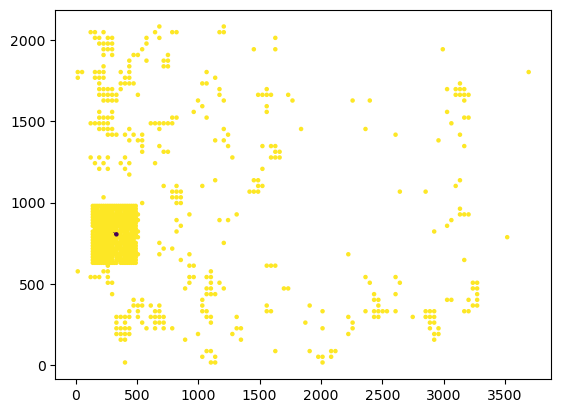

[218, 1018]
11026
14479
8155
9038
17121
8150
12125
8154
12332
8596
12340
14037
8588
11906
11713
8592
12113
12344
12121
9035
12117
9249
11456
13571
9691
11683
11009
11679
11010
11018
15195
11014
9911
13583
11022
15191
10799
11671
10576
13465
10349
10572
10507
15629
10361
11839
10795
10357
13027
10790
10134
11843
16067
9923
11233
9919
13945
11228
19323
9915
11242
11229
20641
9254
11890
21083
9481
12279
11894
9477
11455
11670
19753
8816
10581
12109
9043
11841
12116
9039
14385
12108
8597
11395
8819
22871
8374
10588
8812
5233
18709
9029
8321
22229
9033
4329
11889
9250
9263
22221
9473
6531
11452
9471
9916
11451
9688
9701
10130
7948
10362
16071
9909
10354
22663
9913
10358
16075
8605
11287
15645
8609
10792
15641
10351
10577
20913
10793
11019
10348
9047
11023
20479
10789
11234
20475
11450
11457
9910
9485
11680
14765
6395
11672
9695
11888
12114
15633
11892
19591
9927
11903
12348
7275
12333
10138
12330
12337
8811
10146
10791
10807
18707
11448
10387
18715
21513
10584
18711
8163
12993
21079
7936
10

channel  electrode       x       y  Distance from stim
155      218      10138   315.0   805.0            0.000000
610      814       9918   315.0   787.5           17.500000
116      165      10358   315.0   822.5           17.500000
774      978      10137   297.5   805.0           17.500000
814     1018      10139   332.5   805.0           17.500000
..       ...        ...     ...     ...                 ...
410      607      21521  3167.5  1697.5         2988.864751
398      593       4807  3272.5   367.5         2989.684348
65        99      21083  3202.5  1662.5         3012.135870
176      249      10101  3517.5   787.5         3202.547814
85       123      22871  3692.5  1802.5         3521.720105

[820 rows x 5 columns]

In [259]:
with h5py.File(filepath + filename + filetag, "r") as h5_file:
    stim_elecs = [int(i) for i in np.array(h5_file['assay'][f"stim_elecs_{well_no}"])[0].decode('utf-8').split(',')]
print((stim_elecs))


mapping = mla.load_mapping(filepath + filename + filetag, well_no = well_no)
display(mapping)
plt.scatter(mapping.loc[:, "x"], mapping.loc[:, "y"],  s = 5, c = [mapping.loc[i, "electrode"] not in stim_elecs for i in mapping.index])
plt.show()

stim_channels = [mapping.loc[mapping["electrode"] == i, "channel"].values[0] for i in stim_elecs]

print(stim_channels)


def electrode_distance(electrode1, electrode2, mapping):
    print(electrode1)
    e1_x = mapping.loc[mapping["electrode"] == electrode1, "x"].values[0]
    e1_y = mapping.loc[mapping["electrode"] == electrode1, "y"].values[0]
    e2_x = mapping.loc[mapping["electrode"] == electrode2, "x"].values[0]
    e2_y = mapping.loc[mapping["electrode"] == electrode2, "y"].values[0]

    return np.sqrt((e2_x - e1_x)**2 + (e2_y - e1_y)**2)


mapping["Distance from stim"] = [electrode_distance(i, stim_elecs[0], mapping) for i in mapping["electrode"]]
mapping = mapping.sort_values("Distance from stim")
display(mapping)



In [270]:
selected_events = trimmed_events.loc[trimmed_events["eventid"] == 116, :].reset_index()
selected_events

level_0 index   frameno eventtype eventid  \
0       150  1620  14706099         1     116   
1       151  1638  14746121         1     116   
2       152  1656  14786114         1     116   
3       153  1674  14826113         1     116   
4       154  1692  14866118         1     116   
5       155  1710  14906143         1     116   
6       156  1728  14946144         1     116   
7       157  1746  14986167         1     116   
8       158  1764  15026166         1     116   
9       159  1782  15066147         1     116   
10      160  1800  15106161         1     116   
11      161  1818  15146174         1     116   
12      162  1836  15186169         1     116   
13      163  1854  15226207         1     116   
14      164  1872  15266190         1     116   
15      165  1890  15306224         1     116   
16      166  1908  15346194         1     116   
17      167  1926  15386201         1     116   
18      168  1944  15426201         1     116   
19      169  1962  15466200         1     116   
20      170  1980  15506206         1     116   
21      171  1998  15546222         1     116   
22      172  2016  15586239         1     116   
23      173  2034  15626263         1     116   
24      174  2052  15666226         1     116   
25      175  2070  15706226         1     116   
26      176  2088  15746254         1     116   
27      177  2106  15786258         1     116   
28      178  2124  15826280         1     116   
29      179  2142  15866252         1     116   

                                 eventmessage frameno_adjusted      time  \
0   b'{"start_stimulation":"combined_360"}\n'          6051490   605.149   
1   b'{"start_stimulation":"combined_360"}\n'          6091512  609.1512   
2   b'{"start_stimulation":"combined_360"}\n'          6131505  613.1505   
3   b'{"start_stimulation":"combined_360"}\n'          6171504  617.1504   
4   b'{"start_stimulation":"combined_360"}\n'          6211509  621.1509   
5   b'{"start_stimulation":"combined_360"}\n'          6251534  625.1534   
6   b'{"start_stimulation":"combined_360"}\n'          6291535  629.1535   
7   b'{"start_stimulation":"combined_360"}\n'          6331558  633.1558   
8   b'{"start_stimulation":"combined_360"}\n'          6371557  637.1557   
9   b'{"start_stimulation":"combined_360"}\n'          6411538  641.1538   
10  b'{"start_stimulation":"combined_360"}\n'          6451552  645.1552   
11  b'{"start_stimulation":"combined_360"}\n'          6491565  649.1565   
12  b'{"start_stimulation":"combined_360"}\n'          6531560   653.156   
13  b'{"start_stimulation":"combined_360"}\n'          6571598  657.1598   
14  b'{"start_stimulation":"combined_360"}\n'          6611581  661.1581   
15  b'{"start_stimulation":"combined_360"}\n'          6651615  665.1615   
16  b'{"start_stimulation":"combined_360"}\n'          6691585  669.1585   
17  b'{"start_stimulation":"combined_360"}\n'          6731592  673.1592   
18  b'{"start_stimulation":"combined_360"}\n'          6771592  677.1592   
19  b'{"start_stimulation":"combined_360"}\n'          6811591  681.1591   
20  b'{"start_stimulation":"combined_360"}\n'          6851597  685.1597   
21  b'{"start_stimulation":"combined_360"}\n'          6891613  689.1613   
22  b'{"start_stimulation":"combined_360"}\n'          6931630   693.163   
23  b'{"start_stimulation":"combined_360"}\n'          6971654  697.1654   
24  b'{"start_stimulation":"combined_360"}\n'          7011617  701.1617   
25  b'{"start_stimulation":"combined_360"}\n'          7051617  705.1617   
26  b'{"start_stimulation":"combined_360"}\n'          7091645  709.1645   
27  b'{"start_stimulation":"combined_360"}\n'          7131649  713.1649   
28  b'{"start_stimulation":"combined_360"}\n'          7171671  717.1671   
29  b'{"start_stimulation":"combined_360"}\n'          7211643  721.1643   

                      eventmessage_decoded  
0   {"start_stimulation":"combined_360"}\n  
1   {"start_stimulation":"combined_36

(30, 100, 80)
155     218
610     814
116     165
774     978
814    1018
       ... 
3         4
474     674
233     348
732     936
761     965
Name: channel, Length: 80, dtype: int32
[218, 814, 165, 978, 1018, 772, 88, 76, 404, 388, 956, 632, 616, 177, 915, 517, 971, 802, 962, 966, 149, 64, 882, 282, 687, 697, 389, 816, 104, 648, 620, 516, 72, 60, 92, 883, 109, 153, 790, 890, 683, 863, 202, 80, 48, 281, 181, 786, 514, 157, 161, 806, 758, 788, 100, 74, 420, 776, 584, 836, 957, 744, 996, 981, 813, 1002, 807, 643, 875, 521, 822, 334, 902, 943, 705, 4, 674, 348, 936, 965]


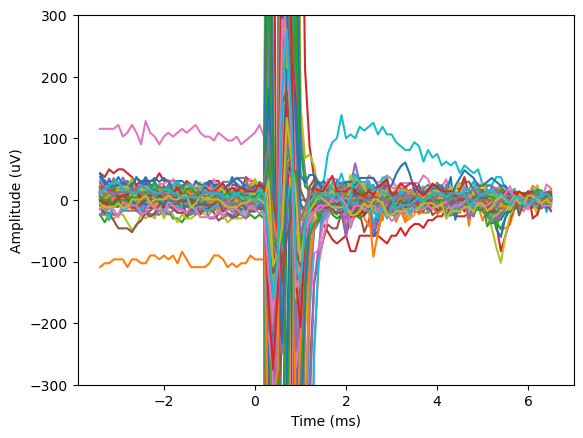

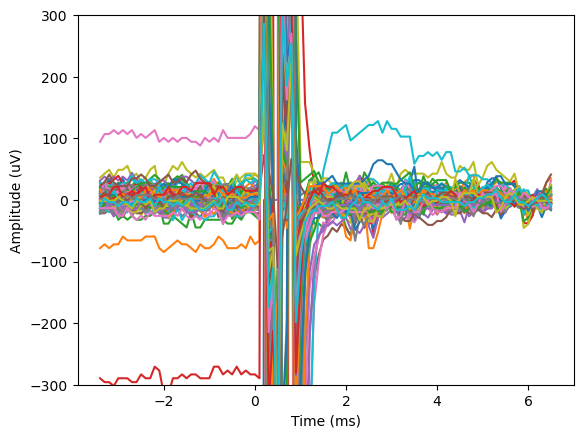

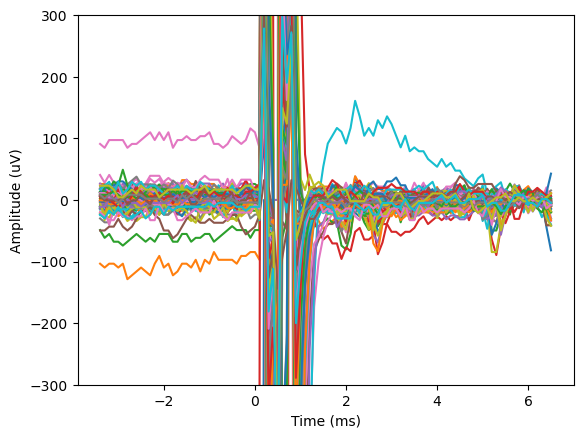

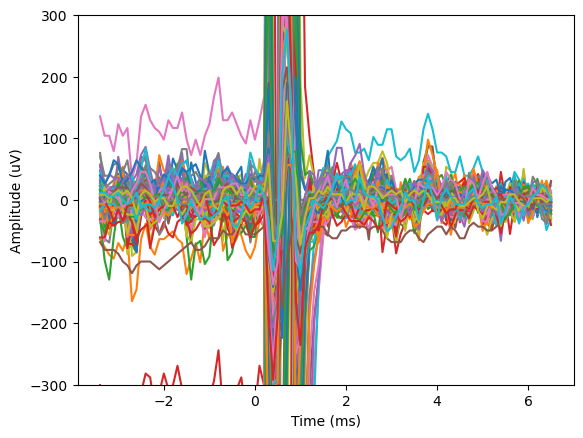

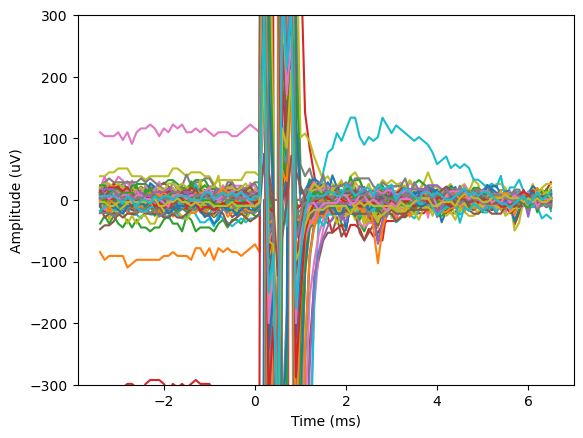

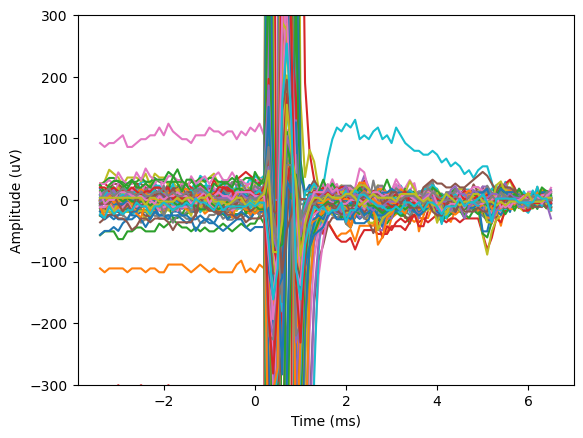

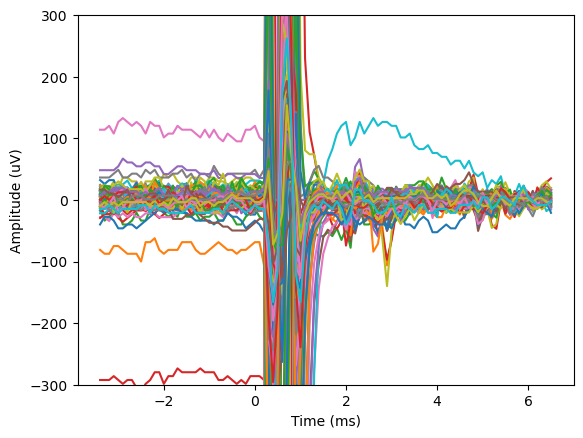

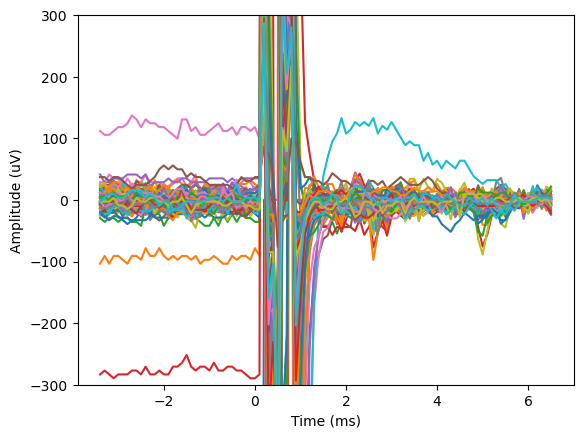

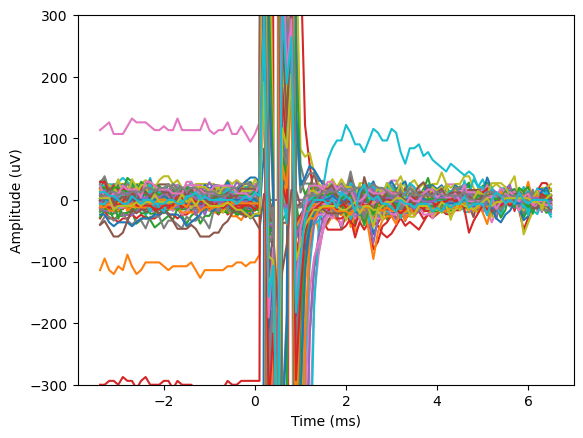

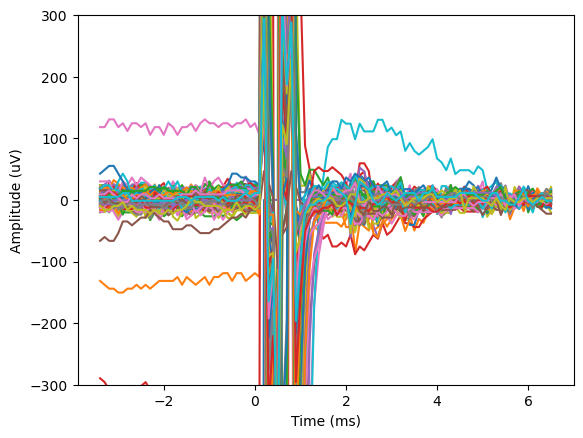

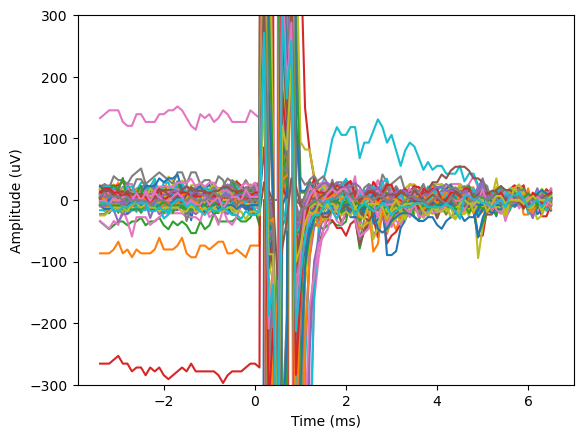

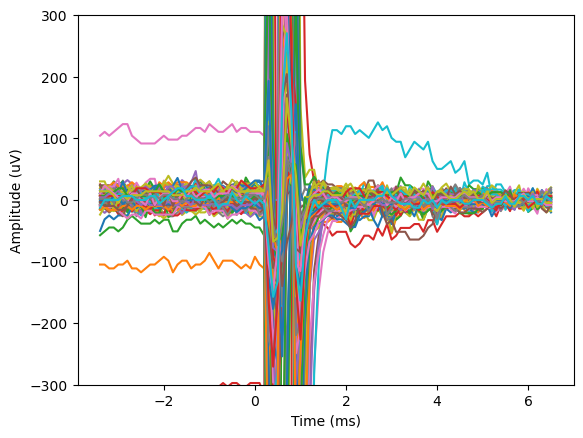

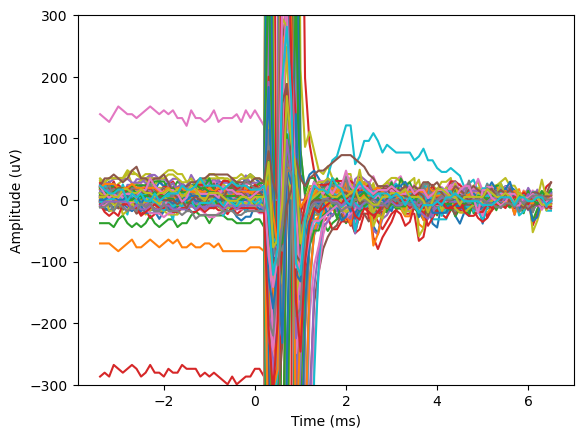

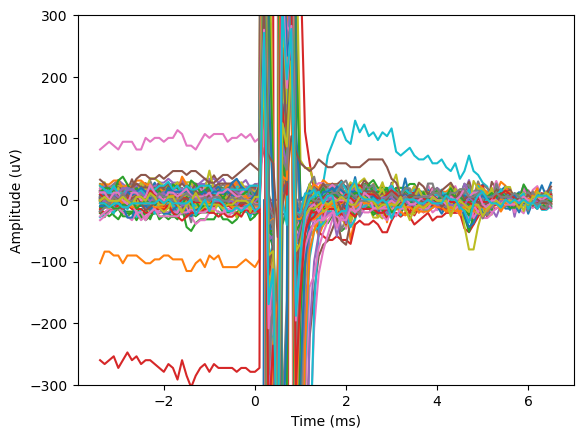

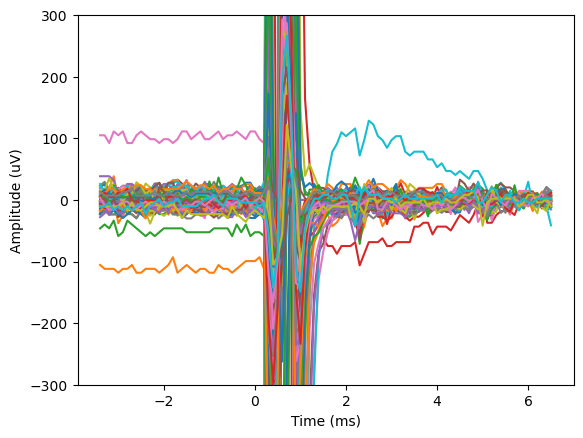

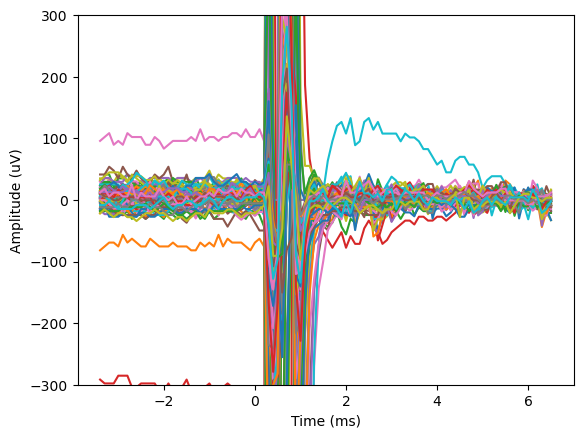

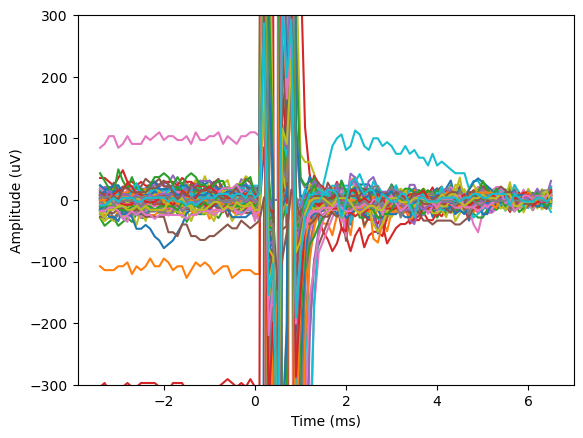

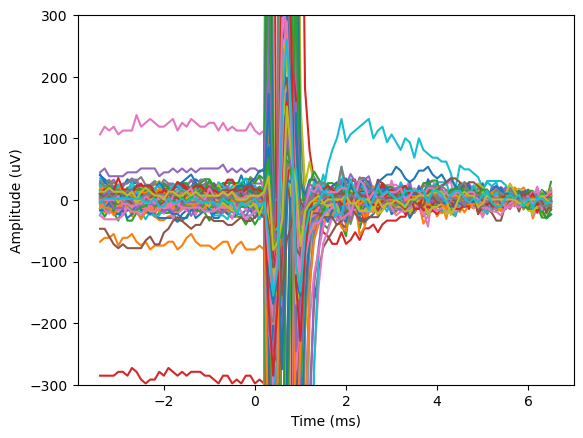

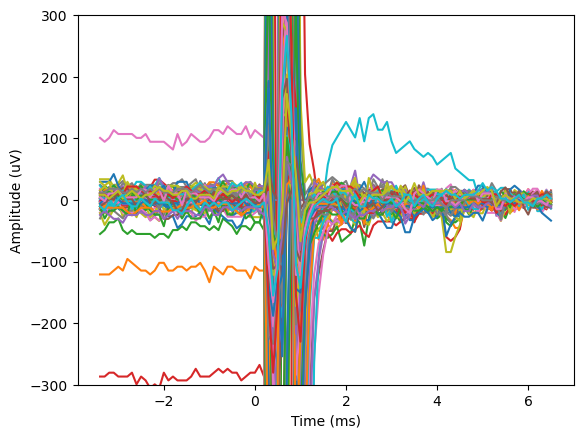

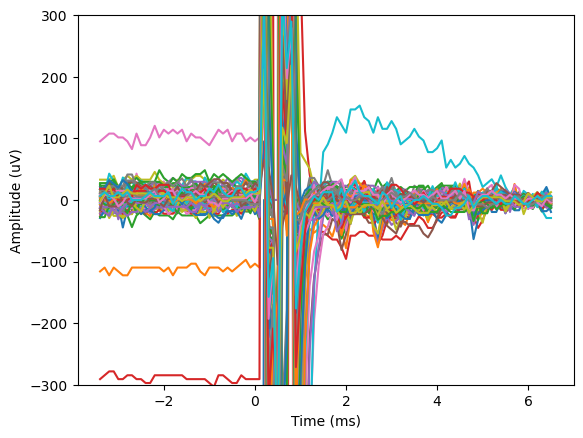

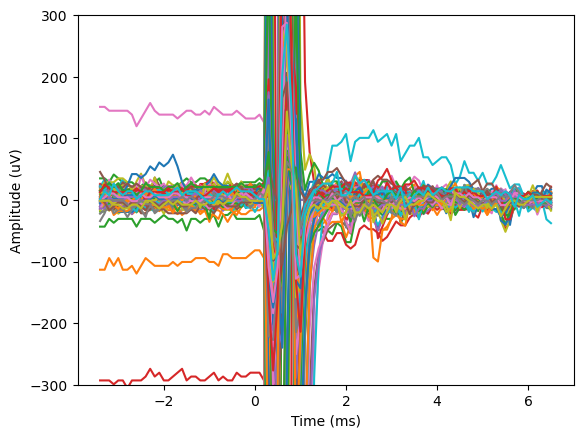

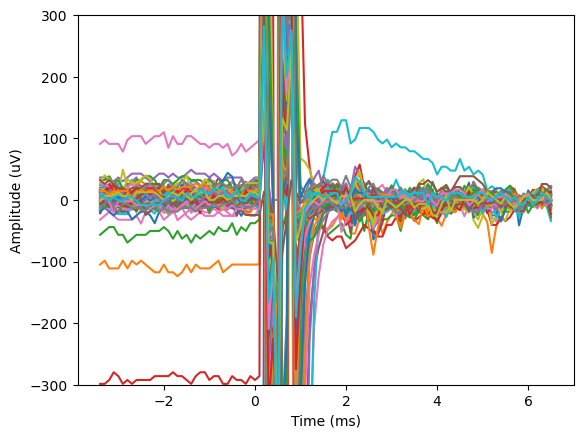

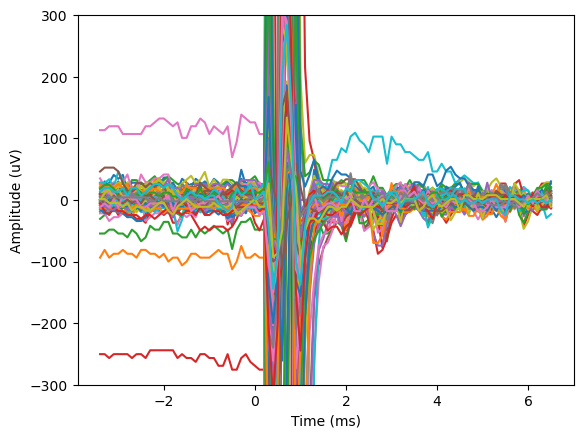

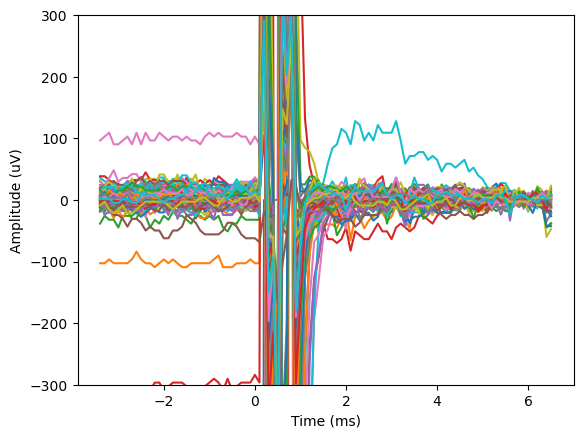

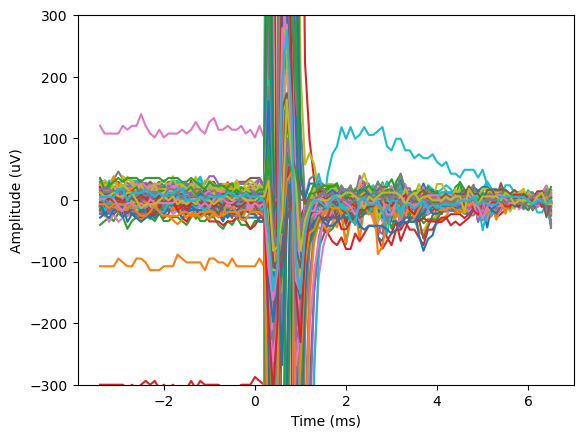

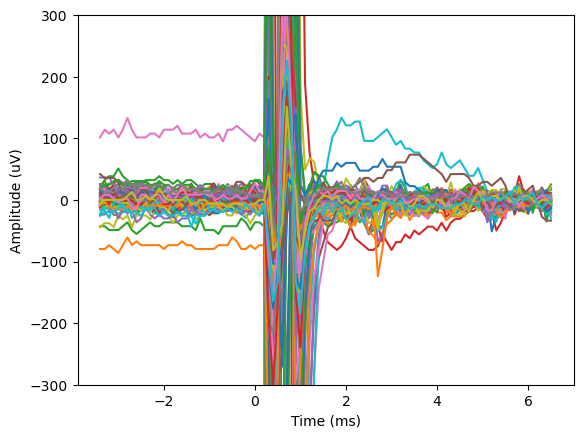

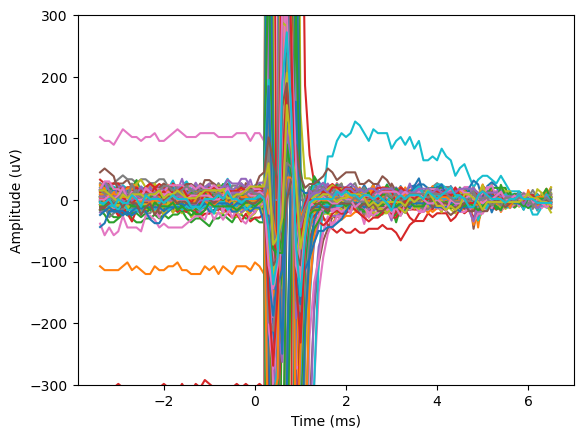

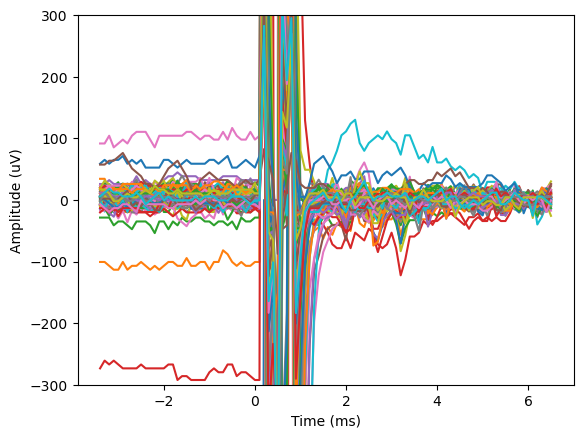

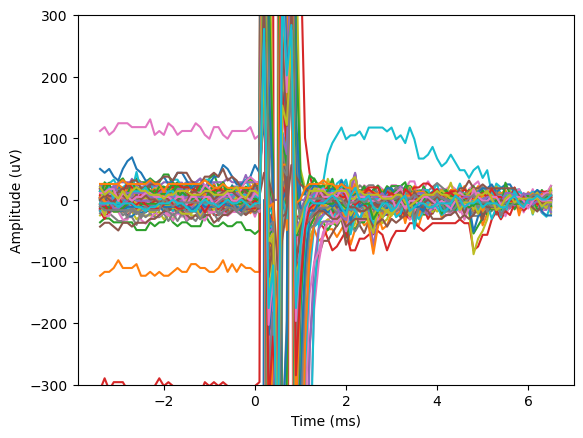

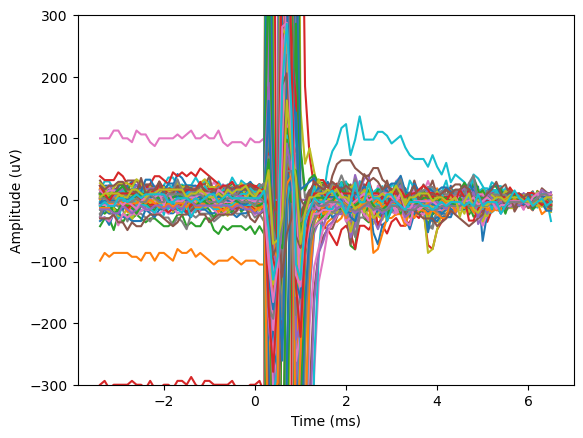

array([[[-3.34224696e-03, -1.09100340e-04, -2.37782793e-05, ...,
          1.88827512e-05, -5.59488924e-06,  1.04904173e-05],
        [-3.32965846e-03, -1.02806090e-04, -3.63667801e-05, ...,
          6.29425040e-06, -1.18891396e-05,  1.67846677e-05],
        [-3.39260096e-03, -1.02806090e-04, -2.37782793e-05, ...,
          1.25885008e-05, -1.18891396e-05,  2.30789181e-05],
        ...,
        [ 0.00000000e+00,  4.19616693e-06,  7.69297271e-06, ...,
          0.00000000e+00, -5.59488924e-06,  4.19616693e-06],
        [ 0.00000000e+00,  1.04904173e-05,  1.39872231e-06, ...,
         -6.29425040e-06,  6.99361155e-07,  1.04904173e-05],
        [ 0.00000000e+00,  1.67846677e-05,  7.69297271e-06, ...,
         -6.29425040e-06, -5.59488924e-06,  4.19616693e-06]],

       [[-3.46813197e-03, -7.83284494e-05, -1.95821123e-05, ...,
          1.39872231e-06, -1.39872231e-06, -9.79105617e-06],
        [-3.41148372e-03, -7.20341990e-05, -1.32878619e-05, ...,
          1.39872231e-06, -1.39872231e

In [271]:
#get channel dict
frames = 100

channel_nums = mapping.loc[mapping.index[0:80], "channel"]

all_data_arr = np.zeros((30, frames, len(channel_nums)))
print(all_data_arr.shape)
_, _, channels = mla.load_from_file_by_frames(filepath + filename + filetag, 0, 1, well_no = well_no)
channel_num_to_index_dict = dict()

print(channel_nums)
channel_indices = [list(channels).index(i) for i in channel_nums]
print(channel_indices)


for i, channel in enumerate(channels):
    channel_num_to_index_dict[channel] = i
for i in selected_events.index:
    time = selected_events.loc[i, "time"]
    
    arr, times, channels = mla.load_from_file_by_frames(filepath + filename + filetag, int(time * 10000 - frames/3), frames, well_no = well_no)
    channel_traces = arr[:, channel_indices]

    mean_arr = (np.repeat(np.mean(arr[-10:-1,channel_indices, np.newaxis], 0), np.shape(channel_traces)[0], axis = 1).T)
    #plt.plot(channels)
    plt.plot(times * 1000  - (time * 1000), (channel_traces - mean_arr) * 1000000)
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (uV)")

    plt.ylim([-300, 300])
    plt.show()

    all_data_arr[i, :, :] = channel_traces - mean_arr
        
plt.show()


all_data_arr



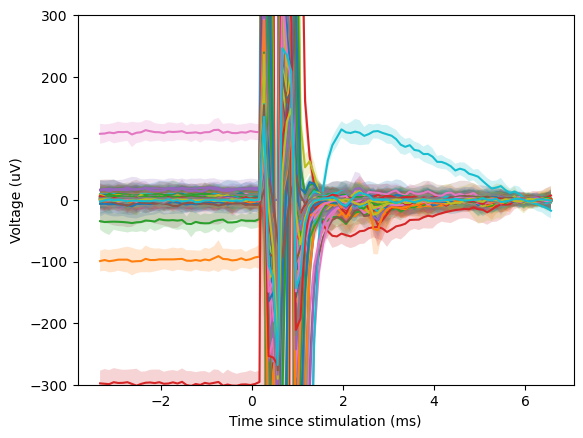

In [272]:

mean = all_data_arr.mean(axis = 0)*1000000
stdev = all_data_arr.std(axis = 0)*1000000

for i in range(np.shape(mean)[1]):
    plt.plot((times - times[0]) * 1000  - (frames/3 /10), mean[:, i], label = i)
    plt.fill_between((times - times[0]) * 1000 - (frames/3 /10), mean[:, i] + stdev[:, i], mean[:, i] - stdev[:, i], label = i, alpha = 0.2)
    plt.xlabel("Time since stimulation (ms)")
    plt.ylabel("Voltage (uV)")
    plt.ylim(-300, 300)


In [273]:
spike_df = mla.load_spikes_from_file(filepath + filename + filetag, well_no)
binned_data, spike_data, _ = mla.bin_spike_data(spike_df, mapping)

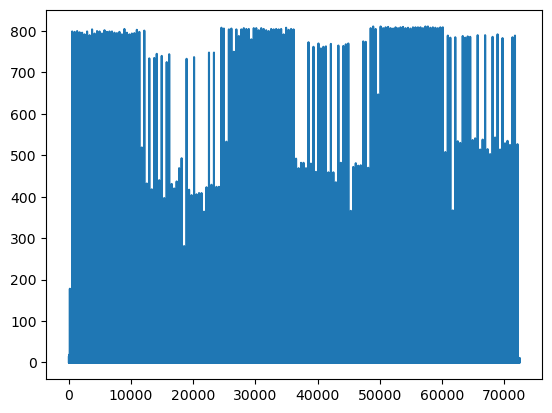

In [274]:
plt.plot(binned_data.sum(1))